In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [2]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(['Cabin','PassengerId','Ticket','Name'], axis=1, inplace=True)

In [4]:
df.isnull().any()
df.dropna(inplace=True)
df.reset_index(inplace=True)
df

,index,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
707,885,0,3,female,39.0,0,5,29.1250,Q
708,886,0,2,male,27.0,0,0,13.0000,S
709,887,1,1,female,19.0,0,0,30.0000,S
710,889,1,1,male,26.0,0,0,30.0000,C


In [5]:
for i in range(len(df)):
    if df.iat[i,3]== 'male':
        df.iat[i,3] = 0
    else:
        df.iat[i,3] = 1
df['Sex'] = df['Sex'].astype(int)
df.drop(['index'],axis=1,inplace=True)
df

,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,29.1250,Q
708,0,2,0,27.0,0,0,13.0000,S
709,1,1,1,19.0,0,0,30.0000,S
710,1,1,0,26.0,0,0,30.0000,C


C:\Users\Mikle\AppData\Local\Temp\ipykernel_17312\424251544.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

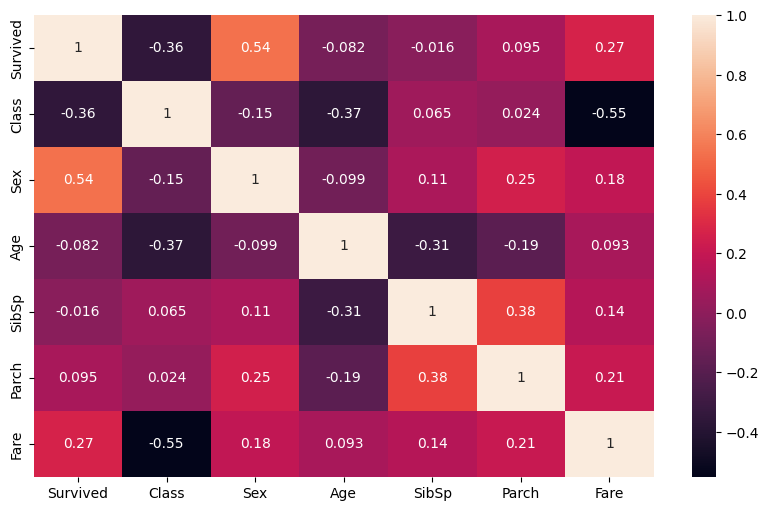

In [6]:
cor = df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(cor, annot=True)

<Axes: xlabel='Sex', ylabel='Survived'>

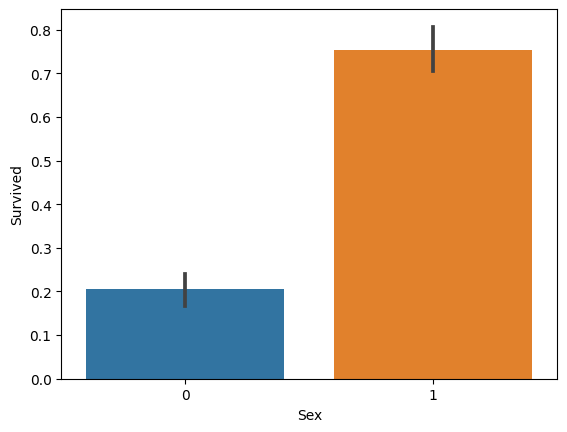

In [7]:
sns.barplot(data=df, x='Sex', y="Survived")

<Axes: xlabel='Embarked', ylabel='Survived'>

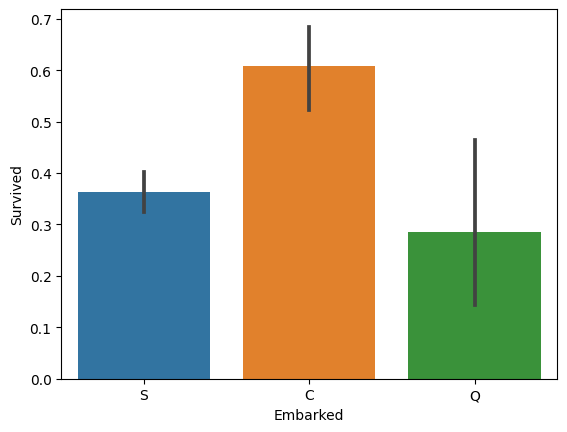

In [8]:
sns.barplot(data=df, x='Embarked', y="Survived")

<Axes: xlabel='Class', ylabel='Survived'>

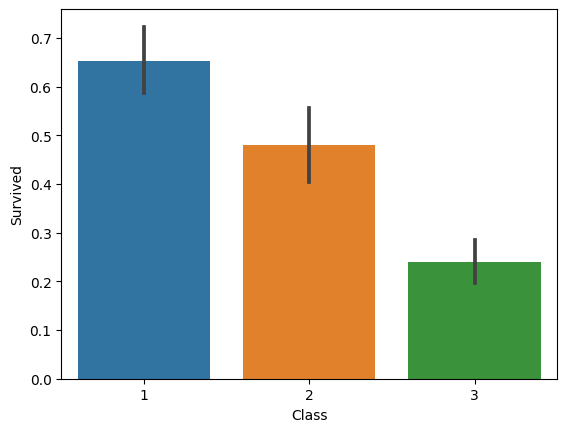

In [9]:
sns.barplot(data=df, x='Class', y="Survived")

In [10]:
train=df.loc[:497]
test=df.loc[498:]

In [11]:
test.describe()

,Survived,Class,Sex,Age,SibSp,Parch,Fare
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.383178,2.266355,0.336449,28.991449,0.457944,0.425234,35.907769
std,0.487301,0.833055,0.473602,14.256578,0.891065,0.888909,63.344688
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,19.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,1.000000,38.750000,1.000000,1.000000,33.000000
max,1.000000,3.000000,1.000000,74.000000,5.000000,6.000000,512.329200


In [12]:
train.describe() #use features class, sex, fare

,Survived,Class,Sex,Age,SibSp,Parch,Fare
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.413655,2.228916,0.375502,29.921687,0.538153,0.435743,33.991206
std,0.492983,0.839066,0.484739,14.598606,0.947065,0.839713,47.837648
min,0.000000,1.000000,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,16.100000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,32.455200
max,1.000000,3.000000,1.000000,80.000000,5.000000,5.000000,512.329200


In [14]:
trainh1 = train.loc[:len(train)/2-1]
trainh2 = train.loc[len(train)/2:]

trainh1.reset_index(drop=True, inplace=True)
trainh2.reset_index(drop=True, inplace=True)
points=[]

def calcDistance(known, unknown, k):
    for i in range(len(unknown)):
        points=[]
        for j in range(len(known)):
            points.append(sqrt((unknown.iat[i,1] - known.iat[j,1])^2+(unknown.iat[i,2] - known.iat[j,2])^2+(unknown.iat[i,6] - known.iat[j,6])^2))
        points.sort()
        topPoints=points[:k-1]


# def vote(topPoints,points, i):
